# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are two important concepts in time series analysis. They help us understand the relationships and dependencies between observations in a time series.

## Autocorrelation Function (ACF)

### Definition:
The ACF measures the correlation between observations of a time series separated by different time lags. It tells us how the current value of the series is related to its past values.

### Purpose:
ACF is used to identify the presence of any correlation at various lags and to determine the order of the Moving Average (MA) component in an ARIMA model.

### Calculation:
The ACF is calculated as the correlation of the time series with itself at different lags.

$$[
\text{ACF}(k) = \frac{\text{Cov}(X_t, X_{t-k})}{\text{Var}(X_t) \cdot \text{Var}(X_{t-k})}
]$$

Where:
- $( k )$ is the lag,
- $( X_t )$ is the time series value at time $( t )$,
- $( X_{t-k})$ is the value at time $( t-k )$.

### Interpretation:
- Values close to +1 indicate a strong positive correlation (i.e., as one increases, the other also increases).
- Values close to -1 indicate a strong negative correlation (i.e., as one increases, the other decreases).
- Values close to 0 indicate no correlation.

---

## Partial Autocorrelation Function (PACF)

### Definition:
The PACF measures the correlation between observations of a time series at different lags, controlling for the values of the intervening lags. It helps to identify the direct relationships between observations by removing the influence of other lags.

### Purpose:
PACF is used to determine the order of the Autoregressive (AR) component in an ARIMA model.

### Calculation:
The PACF is computed by regressing the time series against its past values and then calculating the residuals. The PACF for lag $( k )$ is the correlation of $( X_t )$ with $( X_{t-k} )$, after controlling for $( X_{t-1}, X_{t-2}, \ldots, X_{t-(k-1)} )$.

$$[
\text{PACF}(k) = \text{Corr}(X_t, X_{t-k} \mid X_{t-1}, X_{t-2}, \ldots, X_{t-(k-1)})
]$$

### Interpretation:
- Similar to ACF, PACF values close to +1 or -1 indicate strong correlations.
- The PACF can show cut-off behavior, where it cuts off after a certain lag $(p)$, indicating that the AR process is of order
$( p )$.

---

## Summary
- ACF shows the total correlation of the time series with its lags and helps identify the MA order.
- PACF shows the direct correlation between the time series and its lags, controlling for intermediate lags, helping to identify the AR order.
- Both ACF and PACF plots are crucial in determining the appropriate parameters for ARIMA models in time series forecasting.

## Example of ACF and PACF Plots
- **ACF Plot:** ACF plots display the correlation coefficients for various lags. If the ACF cuts off after lag \( q \), it suggests a MA(q) process.
- **PACF Plot:** PACF plots show the partial correlation coefficients. If the PACF cuts off after lag \( p \), it suggests an AR(p) process.

In summary, ACF and PACF are essential tools for understanding the dynamics of time series data and for building appropriate forecasting models. If you have further questions or need examples, feel free to ask!


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

### 1. Autoregressive (AR) Process:

**Description:** In an AR model, the current value depends on its own previous values plus some noise. An AR process is represented as $( \text{AR}(p))$, where \( p \) is the order of autoregression.

#### ACF:
- Shows a gradual or exponential decay.
- For an $( \text{AR}(p))$ process, the ACF declines gradually or dies out after several lags.

#### PACF:
- Cuts off after lag $( p )$. This means the PACF will have significant spikes up to lag \( p \) and become insignificant (within the confidence interval) after that.
- For example, in an $( \text{AR}(1))$ process, the PACF cuts off sharply after lag 1, while for an $( \text{AR}(2))$ process, it cuts off after lag 2.

#### How to Identify AR Order:
- If the PACF cuts off after lag \( p \), then it's an \( \text{AR}(p) \) process.
- The ACF will decay slowly but consistently, indicating autoregression.


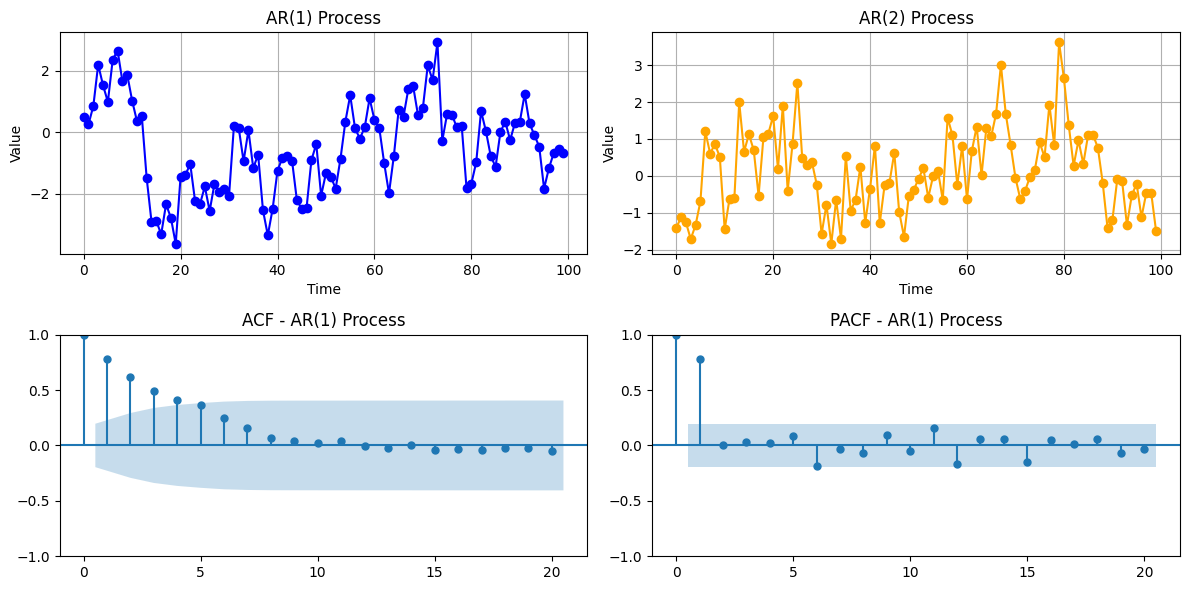

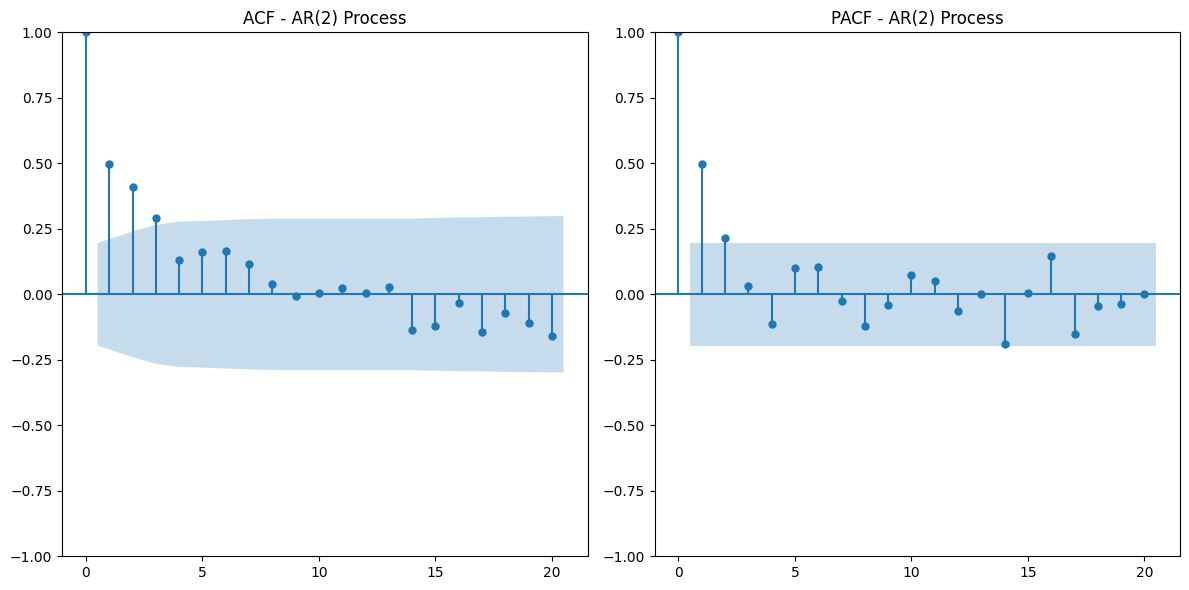

In [21]:
np.random.seed(42)

ar1_params = np.array([1, -0.8])
ar1_process = ArmaProcess(ar=ar1_params)
ar1_series = ar1_process.generate_sample(nsample=100)

ar2_params = np.array([1, -0.5, -0.25])
ar2_process = ArmaProcess(ar=ar2_params)
ar2_series = ar2_process.generate_sample(nsample=100)

df_ar1 = pd.DataFrame(ar1_series, columns=['AR(1) Process'])
df_ar2 = pd.DataFrame(ar2_series, columns=['AR(2) Process'])

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(df_ar1['AR(1) Process'], marker='o', color='blue')
plt.title('AR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_ar2['AR(2) Process'], marker='o', color='orange')
plt.title('AR(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(2, 2, 3)
plot_acf(df_ar1['AR(1) Process'], lags=20, ax=plt.gca())
plt.title('ACF - AR(1) Process')

plt.subplot(2, 2, 4)
plot_pacf(df_ar1['AR(1) Process'], lags=20, ax=plt.gca())
plt.title('PACF - AR(1) Process')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_ar2['AR(2) Process'], lags=20, ax=plt.gca())
plt.title('ACF - AR(2) Process')

plt.subplot(1, 2, 2)
plot_pacf(df_ar2['AR(2) Process'], lags=20, ax=plt.gca())
plt.title('PACF - AR(2) Process')

plt.tight_layout()
plt.show()


### 2. Moving Average (MA) Process:

**Description:** In an MA model, the current value is a linear combination of the current and past error terms (shocks). $( \text{MA}(q))$ refers to a moving average process of order \( q \).

#### ACF:
- Cuts off after lag $( q )$. The ACF shows significant spikes up to lag $( q )$ and then becomes insignificant afterward.
- For example, in an $( \text{MA}(1))$ process, the ACF cuts off sharply after lag 1, and in an $\text{MA}(2))$ process, it cuts off after lag 2.

#### PACF:
- Shows a gradual or exponential decay similar to the AR process.

#### How to Identify MA Order:
- If the ACF cuts off after lag $( q )$, it's an $\text{MA}(q))$ process.
- The PACF will decay gradually or die out slowly.


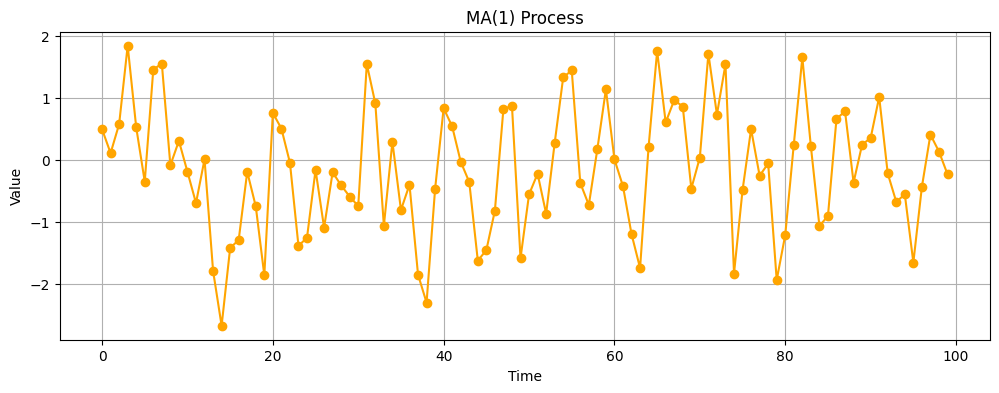

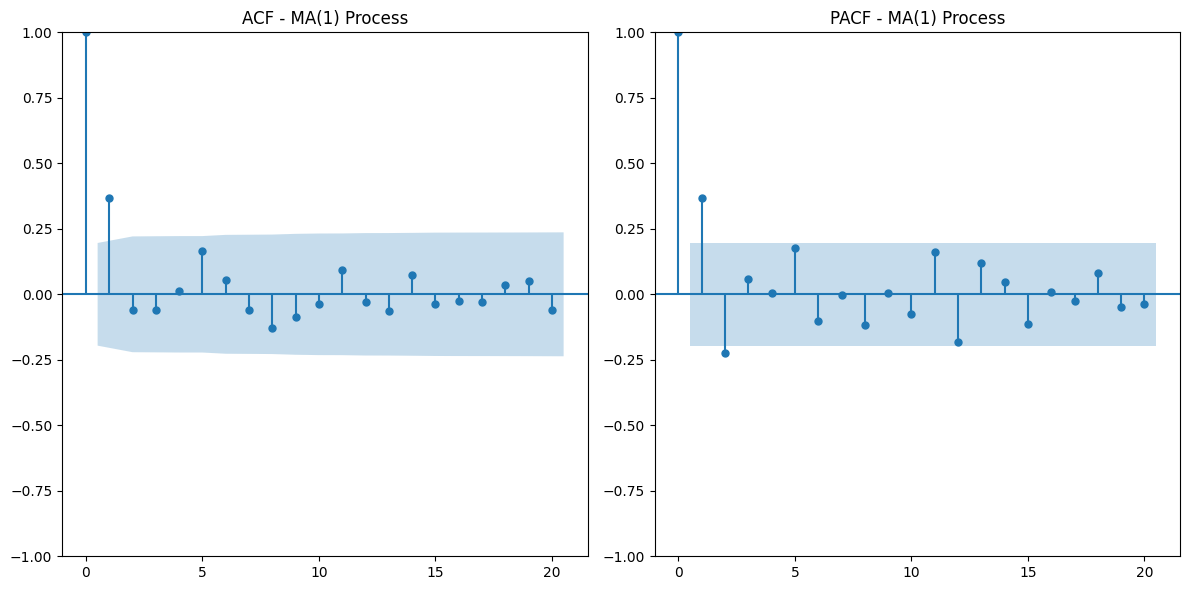

In [22]:
np.random.seed(42)

ma_params = np.array([1, 0.5])

n_samples = 100
ma_process = ArmaProcess(ar=[1], ma=ma_params)
ma_series = ma_process.generate_sample(nsample=n_samples)

df_ma = pd.DataFrame(ma_series, columns=['MA(1) Process'])

plt.figure(figsize=(12, 4))
plt.plot(df_ma['MA(1) Process'], marker='o', color='orange')
plt.title('MA(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_ma['MA(1) Process'], lags=20, ax=plt.gca())
plt.title('ACF - MA(1) Process')

plt.subplot(1, 2, 2)
plot_pacf(df_ma['MA(1) Process'], lags=20, ax=plt.gca())
plt.title('PACF - MA(1) Process')

plt.tight_layout()
plt.show()


### Why They Appear Similar:
For MA processes:

Both the ACF and PACF can exhibit the same pattern due to the lack of autoregressive structure. Therefore, in practice, the PACF can appear very similar to the ACF for MA(1) processes.

### 3. Mixed ARMA (Autoregressive Moving Average) Process:

**Description:** An $( \text{ARMA}(p, q))$ model is a combination of both AR and MA models, where \( p \) is the autoregressive order and \( q \) is the moving average order.

#### ACF:
- Exhibits both exponential decay (due to AR) and possible cutoffs at lag \( q \) (due to MA).

#### PACF:
- Shows exponential decay (due to MA) and possible cutoffs after lag \( p \) (due to AR).

#### How to Identify ARMA Order:
- You will see both behaviors in the plots:
  - ACF cuts off after lag \( q \) (due to the MA part).
  - PACF cuts off after lag \( p \) (due to the AR part).


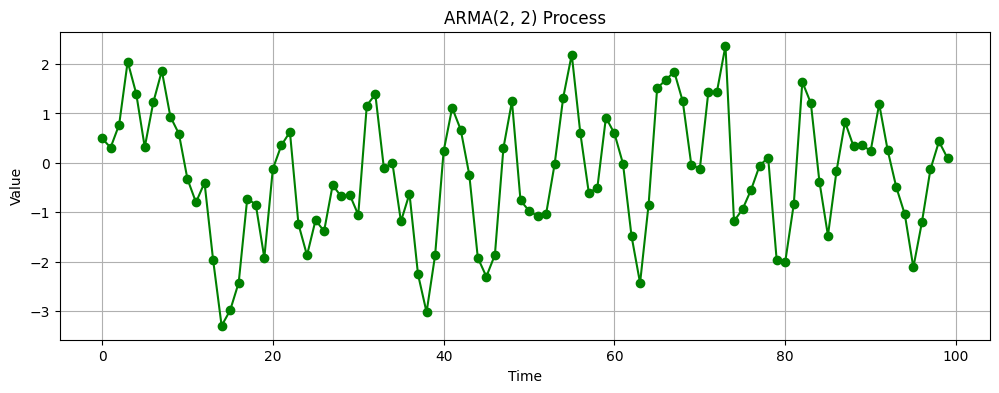

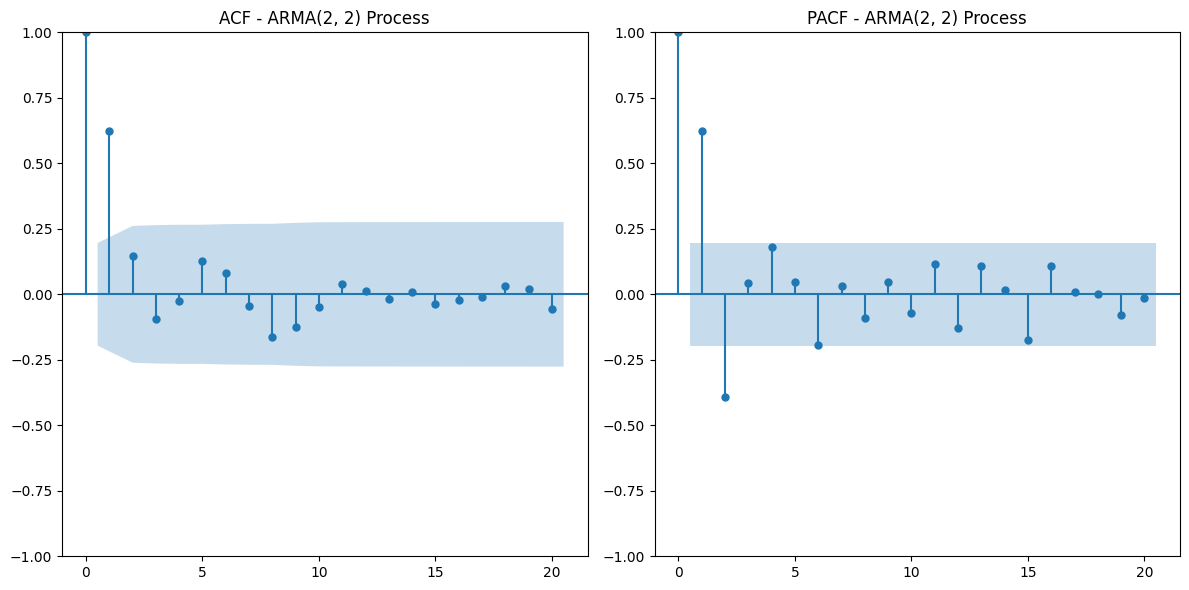

In [23]:
np.random.seed(42)

ar_params = np.array([1, -0.5, 0.25])
ma_params = np.array([1, 0.4, 0.3])

arma_process = ArmaProcess(ar=ar_params, ma=ma_params)
n_samples = 100
arma_series = arma_process.generate_sample(nsample=n_samples)

df_arma = pd.DataFrame(arma_series, columns=['ARMA(2, 2) Process'])

plt.figure(figsize=(12, 4))
plt.plot(df_arma['ARMA(2, 2) Process'], marker='o', color='green')
plt.title('ARMA(2, 2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_arma['ARMA(2, 2) Process'], lags=20, ax=plt.gca())
plt.title('ACF - ARMA(2, 2) Process')

plt.subplot(1, 2, 2)
plot_pacf(df_arma['ARMA(2, 2) Process'], lags=20, ax=plt.gca())
plt.title('PACF - ARMA(2, 2) Process')

plt.tight_layout()
plt.show()


### 4. Exponential Decay Series:

**Description:** In an exponential decay series, the current value is an exponentially smoothed combination of past values, often seen in $( \text{AR}(1))$ processes.

#### ACF:
- Gradual or exponential decay, showing a correlation structure that weakens over time. This suggests dependence over multiple lags.

#### PACF:
- Cuts off after the first lag (for $( \text{AR}(1)))$ or at lag \( p \) (if $( \text{AR}(p))$).
- If PACF cuts off after lag 1, the series is likely $( \text{AR}(1))$.


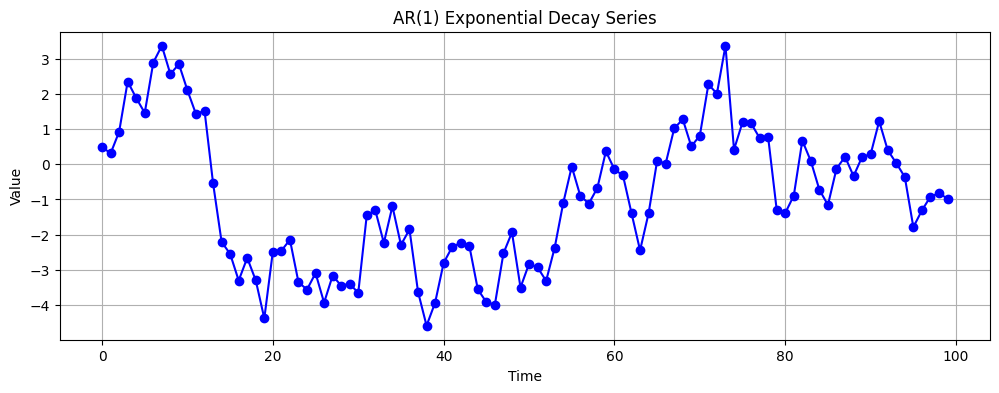

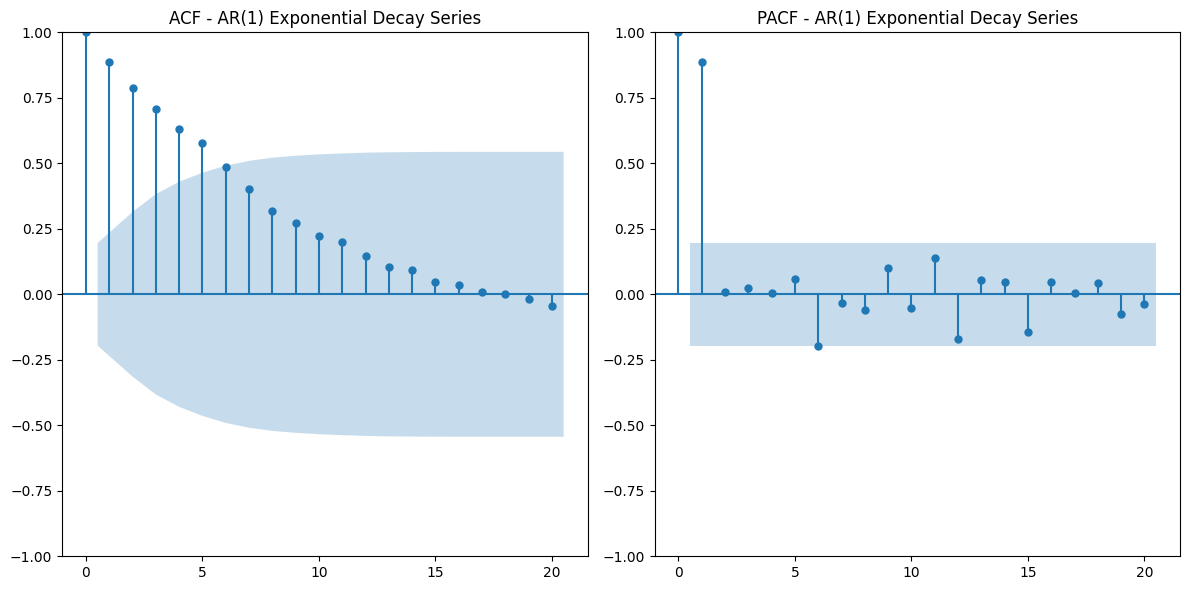

In [24]:
np.random.seed(42)

phi = 0.9
ar_params = np.array([1, -phi])
ma_params = np.array([1])

arma_process = ArmaProcess(ar=ar_params, ma=ma_params)
n_samples = 100
ar1_series = arma_process.generate_sample(nsample=n_samples)

df_ar1 = pd.DataFrame(ar1_series, columns=['AR(1) Exponential Decay'])

plt.figure(figsize=(12, 4))
plt.plot(df_ar1['AR(1) Exponential Decay'], marker='o', color='blue')
plt.title('AR(1) Exponential Decay Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_ar1['AR(1) Exponential Decay'], lags=20, ax=plt.gca())
plt.title('ACF - AR(1) Exponential Decay Series')

plt.subplot(1, 2, 2)
plot_pacf(df_ar1['AR(1) Exponential Decay'], lags=20, ax=plt.gca())
plt.title('PACF - AR(1) Exponential Decay Series')

plt.tight_layout()
plt.show()


### 5. Oscillatory Time Series:

**Description:** Oscillatory series involve periodic components that cause the values to fluctuate in cycles (common in seasonal data).

#### ACF:
- Exhibits sinusoidal or oscillatory patterns. Peaks and troughs alternate at regular intervals, indicating cyclic or seasonal behavior in the data.

#### PACF:
- The PACF may show oscillatory behavior as well, but it may still decay gradually, reflecting the cyclical dependence.

#### How to Identify Cyclic/Seasonal Patterns:
- If both ACF and PACF show regularly spaced peaks and troughs, this is an indicator of oscillatory or seasonal patterns.
- The distance between the peaks or troughs corresponds to the length of the seasonality.


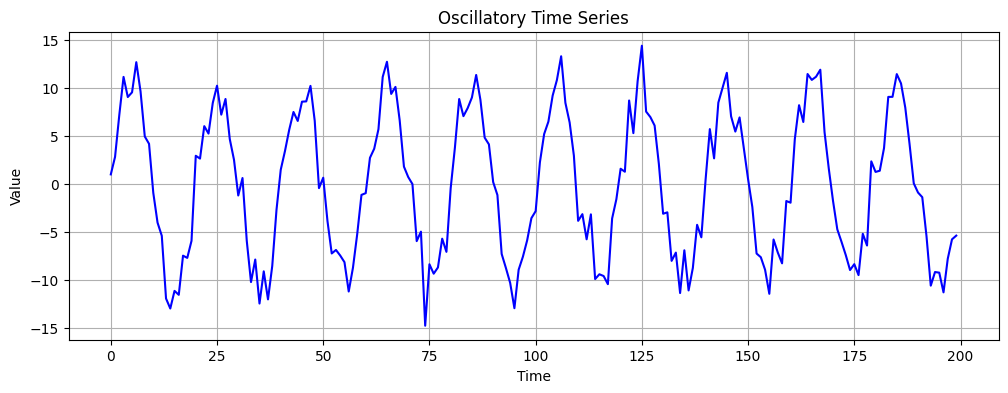

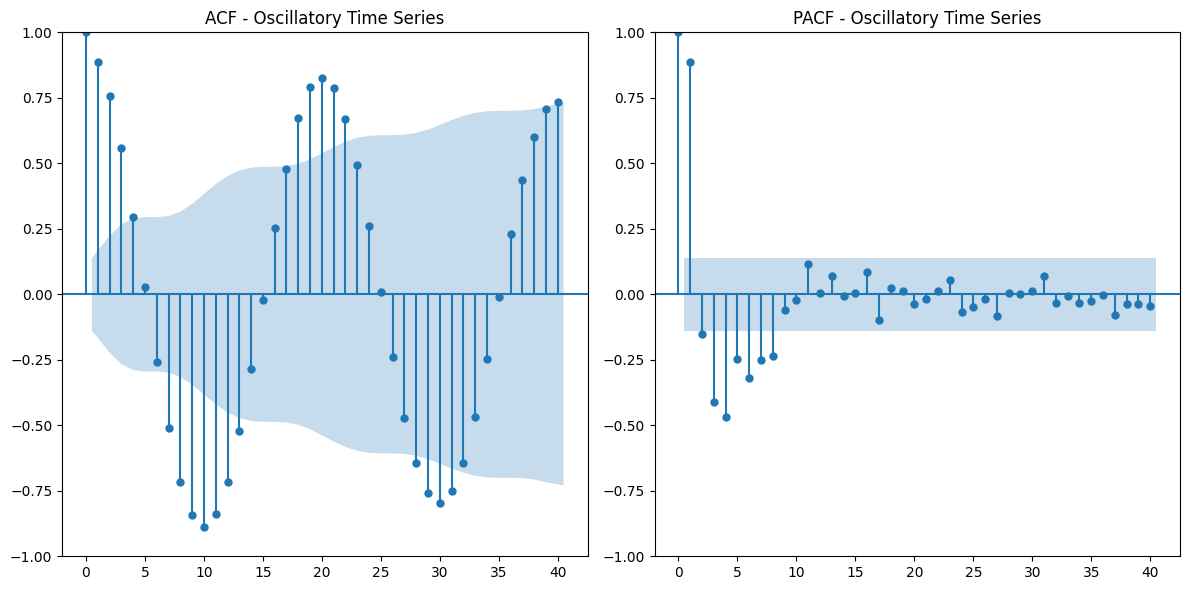

In [25]:
np.random.seed(42)

n_samples = 200
time = np.arange(n_samples)
seasonal_pattern = 10 * np.sin(2 * np.pi * time / 20)

noise = np.random.normal(0, 2, n_samples)

oscillatory_series = seasonal_pattern + noise

df_oscillatory = pd.DataFrame(oscillatory_series, columns=['Oscillatory Series'])

plt.figure(figsize=(12, 4))
plt.plot(df_oscillatory['Oscillatory Series'], color='blue')
plt.title('Oscillatory Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_oscillatory['Oscillatory Series'], lags=40, ax=plt.gca())
plt.title('ACF - Oscillatory Time Series')

plt.subplot(1, 2, 2)
plot_pacf(df_oscillatory['Oscillatory Series'], lags=40, ax=plt.gca())
plt.title('PACF - Oscillatory Time Series')

plt.tight_layout()
plt.show()


### 6. Stationary Time Series:

**Description:** A stationary series has constant mean, variance, and autocovariance over time. It does not exhibit trends or strong seasonal patterns.

#### ACF:
- Quickly decays to zero. There is no significant long-term autocorrelation.

#### PACF:
- Also decays quickly. The PACF shows no significant spikes after lag 0 or 1.

#### How to Identify Stationarity:
- Both the ACF and PACF drop off quickly and remain within the confidence interval bands, showing no sustained correlations.


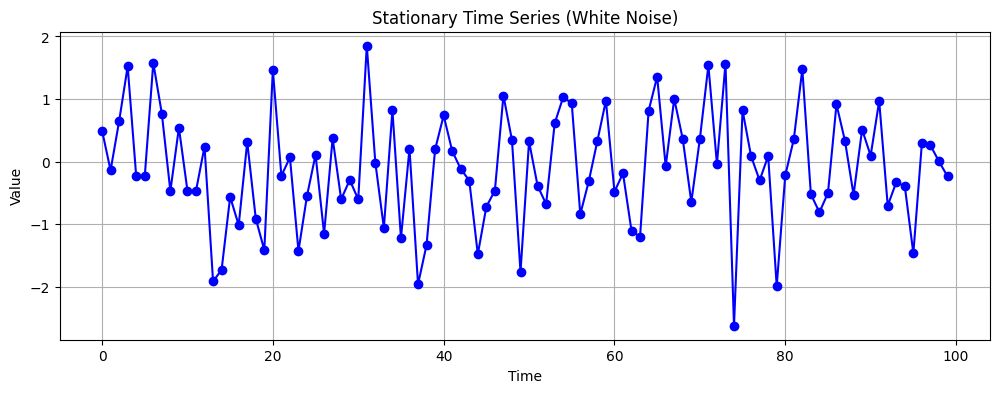

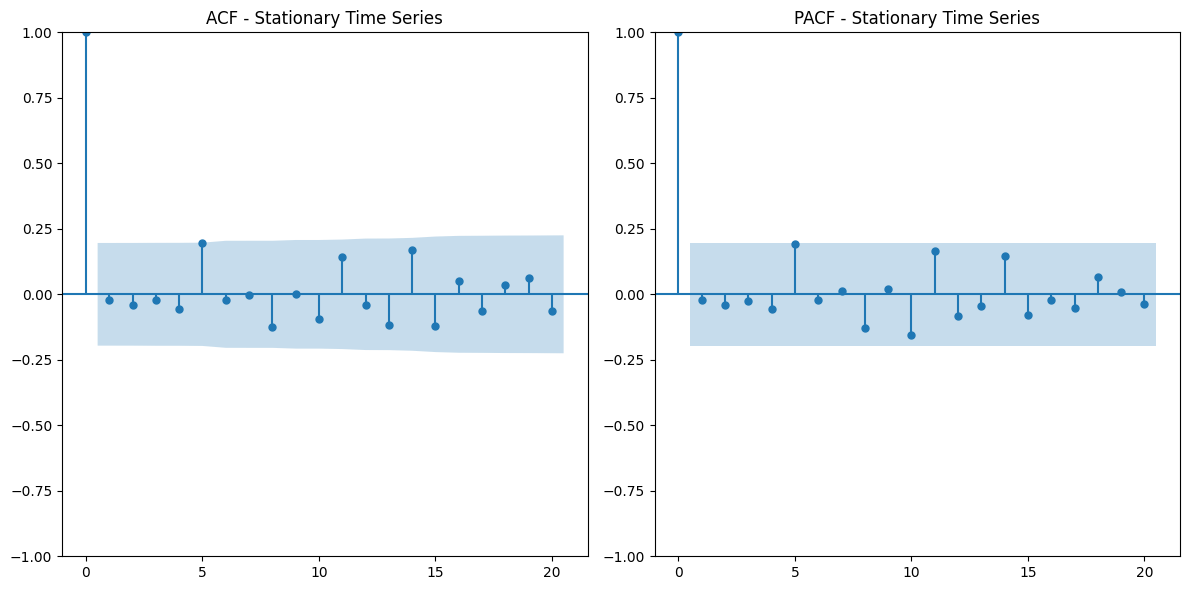

In [26]:
np.random.seed(42)

n_samples = 100
stationary_series = np.random.normal(loc=0, scale=1, size=n_samples)

df_stationary = pd.DataFrame(stationary_series, columns=['Stationary Series'])

plt.figure(figsize=(12, 4))
plt.plot(df_stationary['Stationary Series'], marker='o', color='blue')
plt.title('Stationary Time Series (White Noise)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_stationary['Stationary Series'], lags=20, ax=plt.gca())
plt.title('ACF - Stationary Time Series')

plt.subplot(1, 2, 2)
plot_pacf(df_stationary['Stationary Series'], lags=20, ax=plt.gca())
plt.title('PACF - Stationary Time Series')

plt.tight_layout()
plt.show()


### 7. Cutoff Series (AR or MA Process):

**Description:** A cutoff series refers to the behavior where ACF or PACF sharply cuts off after a certain lag, indicating an autoregressive (AR) or moving average (MA) process.

#### ACF:
- For MA(q), the ACF cuts off after lag \( q \). This indicates that only the first \( q \) lags are correlated, and after that, no significant autocorrelation exists.

#### PACF:
- For AR(p), the PACF cuts off after lag \( p \). This suggests that the data only depends on the first \( p \) lags in terms of autoregressive behavior.

#### How to Identify AR or MA Order:
- If ACF cuts off after lag \( q \), it's an MA(q) process.
- If PACF cuts off after lag \( p \), it's an AR(p) process.


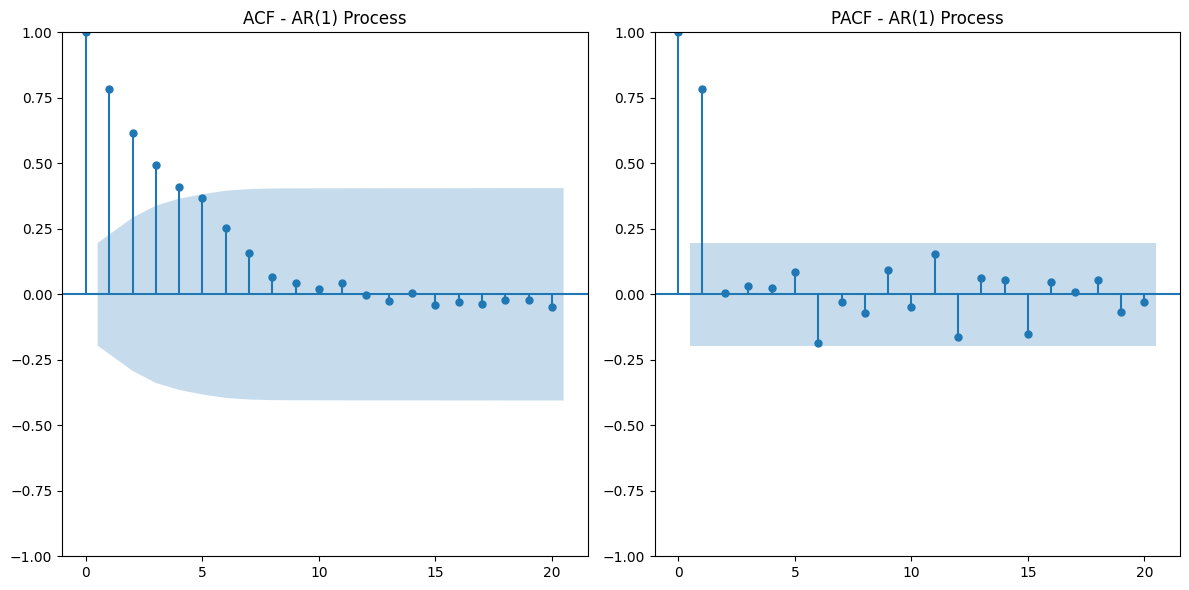

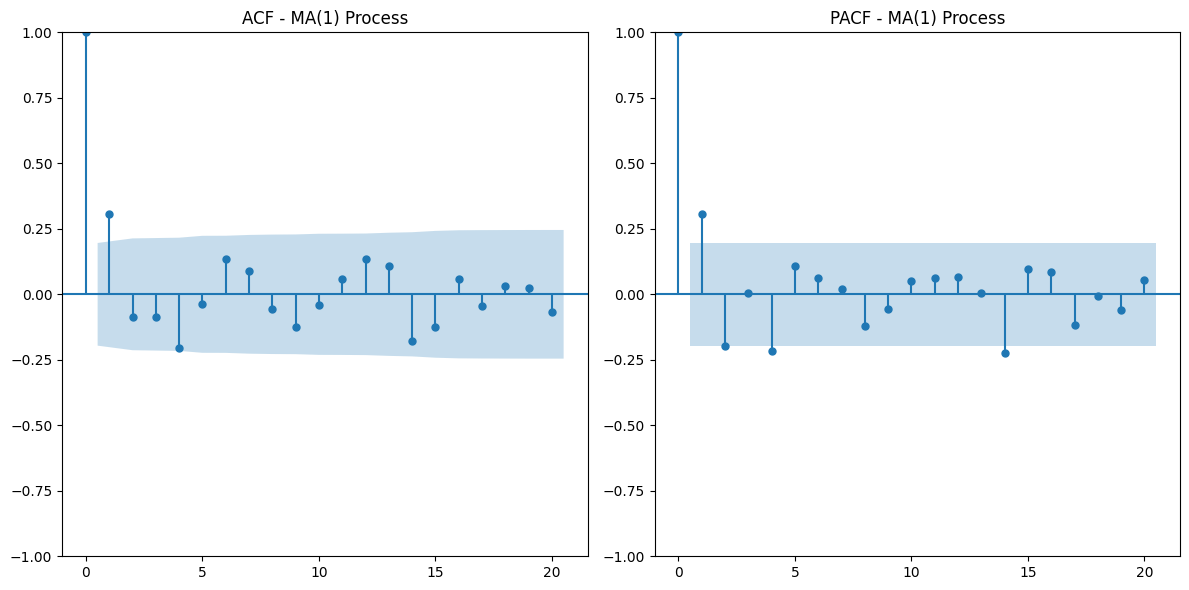

In [27]:
np.random.seed(42)

ar_params = np.array([1, -0.8])
ma_params = np.array([1, 0.5])
ar_process = ArmaProcess(ar=ar_params, ma=[1])
ma_process = ArmaProcess(ar=[1], ma=ma_params)

n_samples = 100
ar_series = ar_process.generate_sample(nsample=n_samples)
ma_series = ma_process.generate_sample(nsample=n_samples)

df_ar = pd.DataFrame(ar_series, columns=['AR(1) Process'])
df_ma = pd.DataFrame(ma_series, columns=['MA(1) Process'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_ar['AR(1) Process'], lags=20, ax=plt.gca())
plt.title('ACF - AR(1) Process')

plt.subplot(1, 2, 2)
plot_pacf(df_ar['AR(1) Process'], lags=20, ax=plt.gca())
plt.title('PACF - AR(1) Process')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_ma['MA(1) Process'], lags=20, ax=plt.gca())
plt.title('ACF - MA(1) Process')

plt.subplot(1, 2, 2)
plot_pacf(df_ma['MA(1) Process'], lags=20, ax=plt.gca())
plt.title('PACF - MA(1) Process')

plt.tight_layout()
plt.show()


### Summary Table

| Process           | ACF Behavior                     | PACF Behavior                   | Model Identification                                     |
|-------------------|----------------------------------|---------------------------------|----------------------------------------------------------|
| **AR(p)**          | Gradual/exponential decay        | Sharp cutoff after lag p         | PACF cuts off at lag p → AR(p)                            |
| **MA(q)**          | Sharp cutoff after lag q         | Gradual/exponential decay        | ACF cuts off at lag q → MA(q)                             |
| **ARMA(p, q)**     | Gradual decay + cutoff at lag q  | Gradual decay + cutoff at lag p  | Both ACF and PACF have cutoff behaviors                   |
| **Exponential Decay** | Gradual/exponential decay     | Sharp cutoff after 1 lag (or p lags) | PACF cuts off → AR(p) model                               |
| **Oscillatory**    | Sinusoidal/oscillating pattern   | Possibly oscillatory, gradual decay | Regular peaks and troughs in ACF & PACF                  |
| **Stationary**     | Quickly decays to zero           | Quickly decays to zero           | Both ACF & PACF drop off quickly (no strong autocorrelation) |
| **Cutoff (AR/MA)** | MA(q): ACF cuts off after q lags | AR(p): PACF cuts off after p lags | ACF cuts off → MA(q), PACF cuts off → AR(p)              |


### Visual Identification:

- **AR Process:** Gradual decay in ACF, sharp cutoff in PACF.

- **MA Process:** Sharp cutoff in ACF, gradual decay in PACF.

- **ARMA Process:** Mix of gradual decay and cutoffs in both ACF and PACF.

- **Oscillatory Series:** Sinusoidal behavior in ACF and PACF.

- **Stationary Series:** Rapid decay in both ACF and PACF.

By understanding the ACF and PACF patterns, you can visually inspect the plots and decide whether the series fits **AR**, **MA**, or **ARMA** models, and determine the order of the process.
